In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Ushbu reportda men Udemy o'quv platformasidagi kurslarni tahlil qilib uni umumiy ma'noda o'rganib chiqishni maqsad qildim.
Buning Uchun Kaglega joylangan datasetdan foydalandim. Keling avval datasetni dataframega aylantirib inu df deb nomlaylik.

In [2]:
df = pd.read_csv('Course_info.csv',)
df.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


In [3]:
df.id.duplicated().sum()

0

DFda ko'rinib turgani kabi takrorlangan qatorlar yo'q ekan. Keling endi sanali ustunlarni datetimega o'tkazamiz.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

Bu yerdagi id, headline, title, instructor-name/url kabi ustunlar analizimizga foyda keltirmaydi.

In [5]:
df.drop(df[['id', 'instructor_url', 'headline', 'title']], axis=1, inplace=True)

In [6]:
df.isnull().sum()

is_paid                 0
price                   0
num_subscribers         0
avg_rating              0
num_reviews             0
num_comments            0
num_lectures            0
content_length_min      0
published_time          0
last_update_date      137
category                0
subcategory             0
topic                 958
language                0
course_url              0
instructor_name         5
dtype: int64

5ta instructor name o'zi nan bo'lishi hozircha muammo emas, topiclar ham unchalik muhim emas, kurslarni guruhlashda category vs subcategory ancha yaxshiroq. keling, Oxirgi yangilanish sanasi NANlarni o'rganib chiqaylik

In [7]:
df[df.last_update_date.isna()]

,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name
1,False,0.00,26474.0,4.500000,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries
4,True,159.99,1266.0,4.750000,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab
10,True,49.99,794.0,4.100000,27.0,16.0,10.0,236.0,2011-07-12T04:11:59Z,NaN,Teaching & Academics,Teacher Training,MBA Admissions,English,/course/business-school/,Clear Admit & Beat The GMAT
11,True,49.99,1322.0,4.450000,196.0,76.0,5.0,140.0,2012-09-12T23:47:03Z,NaN,Health & Fitness,Yoga,Kundalini,English,/course/kundalini-yoga-to-heal-stress-and-anxi...,Valinda Cochella
15,True,39.99,5566.0,4.166666,720.0,163.0,6.0,158.0,2011-07-11T06:29:02Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup/,Eric Ries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65820,True,19.99,1915.0,4.300000,50.0,9.0,63.0,455.0,2019-05-01T17:25:29Z,NaN,IT & Software,Network & Security,Hyperledger Fabric,English,/course/hyperledger-fabric-deep-dive-for-archi...,Joseph Holbrook (The Cloud Tech Guy)
82067,True,1.00,56.0,3.000000,6.0,2.0,0.0,0.0,2020-01-15T16:59:01Z,NaN,IT & Software,IT Certifications,Oracle 1Z0-808,English,/course/java-certification-exam-simulator-2020...,Krishna Sandeep
87118,True,19.99,0.0,0.000000,0.0,0.0,0.0,0.0,2021-08-09T11:19:30Z,NaN,Personal Development,Personal Productivity,Goal Achievement,Portuguese,/course/alcance-os-seus-objetivos/,Élio Ribeiro
107139,True,19.99,2.0,1.000000,1.0,1.0,0.0,0.0,2020-07-18T07:18:08Z,NaN,IT & Software,IT Certifications,Blue Prism,English,/course/asd01-designing-blue-prism-process-sol...,CARTPASSION (OPC) PRIVATE LIMITED


In [8]:
df[df.last_update_date.isna()].topic.unique().size

105

Kurslar har mutlaqo har xil sanalar va har xil mavzurga mansub ekan. 209 ming qatordan 137ta chalsini tashlab yuborsa yaxshilikka bo'ladi deb o'ylayman.

In [9]:
df.drop(df[df.last_update_date.isna()].index, inplace=True)

# Sanalani to'g'ri formatlaymiz va o'zimiz xohlagan ustunlarni qo'shamiz

In [10]:
import datetime as dt
df.last_update_date = pd.to_datetime(df.last_update_date, format='%Y-%m-%d')
df.loc[:, 'published_time'] = pd.to_datetime(df.published_time, format='%Y-%m-%dT%H:%M:%SZ')
df['published_date'] = df.published_time.dt.date.astype('datetime64[ns]')
df.head()

,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,published_date
0,True,24.99,2231.0,3.75000,134.0,42.0,37.0,1268.0,2010-08-05 22:06:13,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,2010-08-05
2,True,19.99,1713.0,4.40000,41.0,13.0,14.0,82.0,2010-10-13 18:07:17,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,2010-10-13
3,True,199.99,4988.0,4.80000,395.0,88.0,36.0,1511.0,2011-06-20 20:08:38,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,2011-06-20
5,True,29.99,20505.0,4.53012,796.0,135.0,31.0,1163.0,2011-07-15 04:13:24,2018-05-22,Health & Fitness,Yoga,Yoga,English,/course/yoga-for-weight-loss-and-core-strength...,Sadie Nardini,2011-07-15
6,True,39.99,3309.0,3.85000,958.0,241.0,8.0,80.0,2010-04-14 16:32:46,2019-03-07,Finance & Accounting,Investing & Trading,Swing Trading,English,/course/swing-trading-the-stock-market/,Tom Watson,2010-04-14


Endi esa sanalarni binlarga ajratib olis uchun eng avvalgi va oxirgi sanalarni ko'ramiz.

In [11]:
df.last_update_date.max(), df.published_date.max(), df.published_date.min()

(Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-10-05 00:00:00'),
 Timestamp('2010-04-14 00:00:00'))

# Har bir oylar bo'yicha binlar yasab qaysi oyda kurs yasalgani va qaysi oyda u oxirgi marta yangilanganini ko'rsatuvchi ustunlar qo'shaylik.

In [12]:
month_bins = pd.date_range(dt.date(2009, 12, 12), dt.date(2022, 11, 1), freq='M')
published_bins = pd.cut(df.published_date, month_bins)
update_bins = pd.cut(df.last_update_date, month_bins)
df['published_month'] = published_bins
df['last_update_month'] = update_bins
df.head()

,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,published_date,published_month,last_update_month
0,True,24.99,2231.0,3.75000,134.0,42.0,37.0,1268.0,2010-08-05 22:06:13,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,2010-08-05,"(2010-07-31, 2010-08-31]","(2020-10-31, 2020-11-30]"
2,True,19.99,1713.0,4.40000,41.0,13.0,14.0,82.0,2010-10-13 18:07:17,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,2010-10-13,"(2010-09-30, 2010-10-31]","(2019-09-30, 2019-10-31]"
3,True,199.99,4988.0,4.80000,395.0,88.0,36.0,1511.0,2011-06-20 20:08:38,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,2011-06-20,"(2011-05-31, 2011-06-30]","(2015-12-31, 2016-01-31]"
5,True,29.99,20505.0,4.53012,796.0,135.0,31.0,1163.0,2011-07-15 04:13:24,2018-05-22,Health & Fitness,Yoga,Yoga,English,/course/yoga-for-weight-loss-and-core-strength...,Sadie Nardini,2011-07-15,"(2011-06-30, 2011-07-31]","(2018-04-30, 2018-05-31]"
6,True,39.99,3309.0,3.85000,958.0,241.0,8.0,80.0,2010-04-14 16:32:46,2019-03-07,Finance & Accounting,Investing & Trading,Swing Trading,English,/course/swing-trading-the-stock-market/,Tom Watson,2010-04-14,"(2010-03-31, 2010-04-30]","(2019-02-28, 2019-03-31]"


# Qachon qanchadan darslar chop etilganini ko'rib tahlil qilamiz

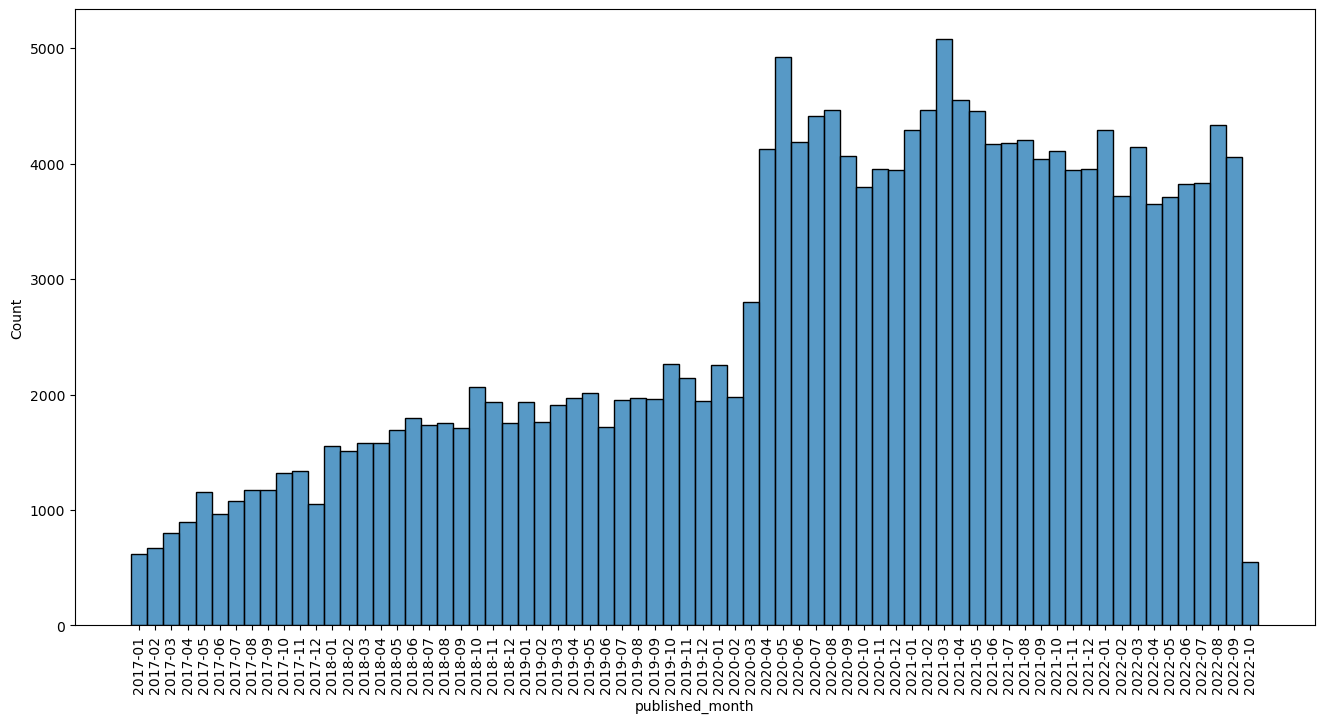

In [13]:
plt.figure(figsize=(16,8))
df2017 = df[df['published_date']> np.datetime64("2017-01-01")]
sns.histplot(data=df2017.sort_values('published_date'), x=df2017['published_month'].astype('str').map(lambda x:x[13:-4]).sort_values())
plt.xticks(rotation=90)
plt.show()

Ko'rinib turbdiki 2020-yil martidan joylangan kurslar soni keskin ko'tarilgan va bunga asosiy sabab sifatida Covid-19 Pandemiyyasi va dunyo bo'ylab joriy qilinga karantinni ko'rsatmay iloj yo'q. shuning uchun ham karantinlar tugagach yangi darslar chiqishi umuman olganda ozgina kamaygan deb o'ylayman.

In [14]:
df[(df.published_date > np.datetime64("2020-03-01")) & (df.published_date < np.datetime64("2020-05-01"))].num_subscribers.mean()

2959.638276262333

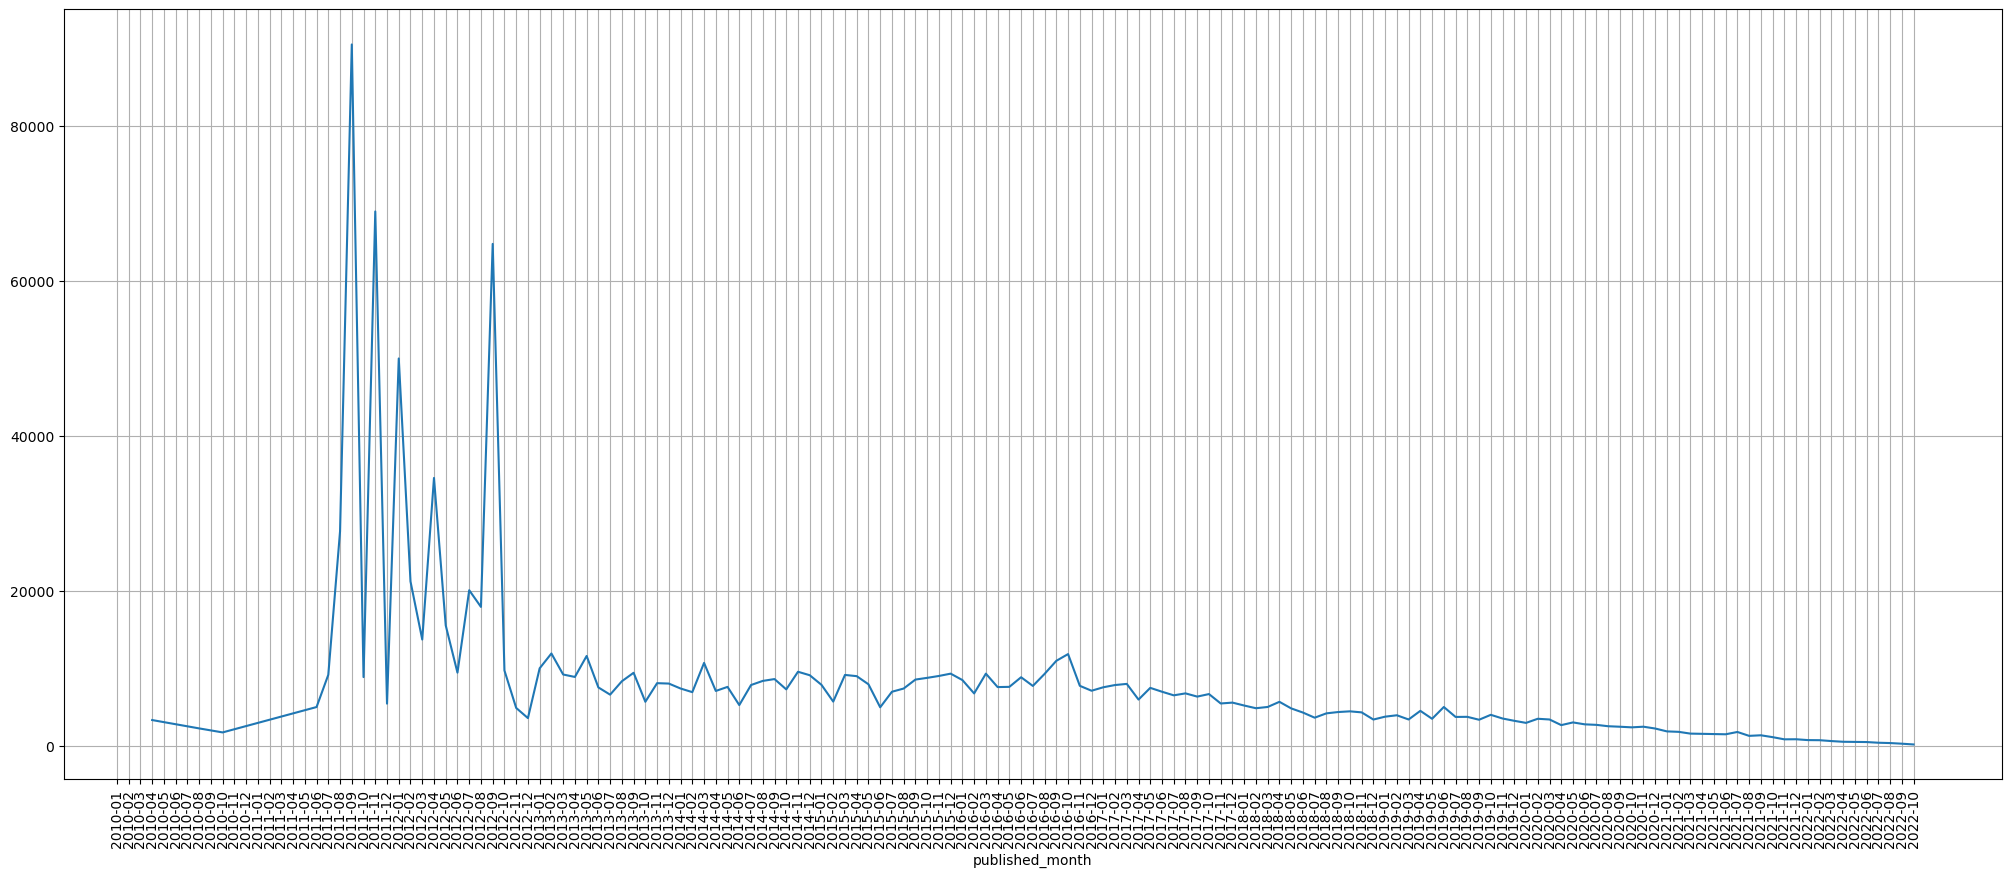

In [15]:
sub_by_month = df.groupby('published_month').num_subscribers.mean()
plt.figure(figsize=(25,10))
sns.lineplot(data=sub_by_month, x=sub_by_month.index.astype('str').map(lambda x:x[13:-4]).sort_values(), y=sub_by_month.values)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.show()

Bu yerda har bir oyda yuklangan kurslarning 2020-10dagi o'rtacha obunachilari soni ko'rsatildi. Kechroq yuklanga darsliklarda kamroq obunachi bo'lishi tabiiy, chunki birinchidan ulardan oldin yuklangan va alla qachon yaxshigina obunachilari va ratingi bor kurslar bilan tengma-teng bahslashib bo'lmaydi. Bu yerda qiziq narsa shuki, 2020-martdan keyin o'rtacha oylik yuklangan darslar soni 2 barobar oshganiga qaramay o'rtacha obunachilar soni keskin tushib ketmaganida. Bu esa taklifga mos keluvchi talab bo'lganini bildiradi(Ya'ni yangi kurslarga ham talab topilgan).

Yuqorida Undemy qaysi mavzularda eng ko'p darsliklar qo'yilganini ko'rishimiz mumkin.

In [16]:
df.topic.unique().size

3819

In [17]:
df.category.unique().size, df.subcategory.unique().size

(13, 130)

In [18]:
df[df.topic == 'Python'].category.value_counts()

Development             1913
IT & Software            571
Teaching & Academics      26
Finance & Accounting      22
Business                  12
Office Productivity        4
Marketing                  4
Design                     1
Name: category, dtype: int64

Ko'rinib turganidek topic subcategorylarga mutlaqo bog'lanmagan va tushunishim bo'yicha istructorlar tomonidan so'z bilan shunchaki to'ldirib qo'yilgan. Shuning uchun ham nan valuelarga ham ruhsat berilgan nazarimda.

In [19]:
df.category.value_counts()

Development             31621
IT & Software           30473
Teaching & Academics    26289
Business                24638
Personal Development    21229
Design                  15240
Health & Fitness        11556
Marketing               11209
Lifestyle               10646
Finance & Accounting    10572
Office Productivity      6288
Music                    5972
Photography & Video      3864
Name: category, dtype: int64

In [20]:
df.subcategory.value_counts()[:15]

Other IT & Software              11523
Web Development                  10383
IT Certifications                10332
Language Learning                 7551
Programming Languages             7022
Personal Transformation           5663
Network & Security                4832
Engineering                       4348
Entrepreneurship                  4337
Microsoft                         4307
Investing & Trading               3964
3D & Animation                    3772
Arts & Crafts                     3509
Career Development                3461
Graphic Design & Illustration     3323
Name: subcategory, dtype: int64

In [21]:
df.drop(['category', 'topic', 'language', 'instructor_name', 'published_month', 'last_update_month', 'course_url'], axis=1).groupby('subcategory').agg([len, np.mean, np.median]).sort_values(('num_subscribers', 'mean'), ascending=False).head(10)

is_paid                   price             \
                                      len      mean median    len       mean   
subcategory                                                                    
Programming Languages                7022  0.895756    1.0   7022  95.820889   
Data Science                         2836  0.925952    1.0   2836  98.753565   
Web Development                     10383  0.875277    1.0  10383  94.803102   
Business Analytics & Intelligence    1760  0.926136    1.0   1760  95.246085   
Search Engine Optimization            871  0.835821    1.0    871  84.324811   
Software Testing                     1038  0.890173    1.0   1038  71.025260   
Database Design & Development        1715  0.921866    1.0   1715  99.739248   
Network & Security                   4832  0.909147    1.0   4832  85.213162   
Mobile Development                   2676  0.912556    1.0   2676  99.556551   
Web Design                           1355  0.818450    1.0   1355  76.639727   

                                          num_subscribers               \
                                   median             len         mean   
subcategory                                                              
Programming Languages              49.990            7022  8316.053688   
Data Science                       56.995            2836  7642.193935   
Web Development                    49.990           10383  7377.021959   
Business Analytics & Intelligence  59.990            1760  6531.147159   
Search Engine Optimization         34.990             871  5781.593571   
Software Testing                   29.990            1038  5700.342004   
Database Design & Development      69.990            1715  5660.730612   
Network & Security                 34.990            4832  5450.646109   
Mobile Development                 49.990            2676  5427.760463   
Web Design                         24.990            1355  5396.464207   

                                          avg_rating  ... content_length_min  \
                                   median        len  ...             median   
subcategory                                           ...                      
Programming Languages               725.0       7022  ...              272.0   
Data Science                        644.5       2836  ...              292.0   
Web Development                     850.0      10383  ...              264.0   
Business Analytics & Intelligence   775.0       1760  ...              198.5   
Search Engine Optimization          630.0        871  ...              129.0   
Software Testing                   1008.0       1038  ...              240.0   
Database Design & Development       738.0       1715  ...              227.0   
Network & Security                  552.0       4832  ...              185.5   
Mobile Development                  580.5       2676  ...              301.0   
Web Design                          812.0       1355  ...              167.0   

                                  published_time  \
                                             len   
subcategory                                        
Programming Languages                       7022   
Data Science                                2836   
Web Development                            10383   
Business Analytics & Intelligence           1760   
Search Engine Optimization                   871   
Software Testing                            1038   
Database Design & Development               1715   
Network & Security                          4832   
Mobile Development                          2676   
Web Design                                  1355   

                                                                 \
                                                           mean   
subcategory                                                       
Programming Languages             2019-10-22 04:29:58.540729088   
Data Science                      2020-05-15

Python, Excel va shu kabi mavzulardagi kurslar shunchalik ko'p bo'lishiga qaramay o'rtacha obunachilarning ham soni ko'pligi hisobiga bu yerda ham avvalgi marralarni zabd etib turibdi ekan. Eng ko'p dars joylagan o'qituvchilar dars soni va eng mashhur tillar ham qiziq.

In [22]:
df.instructor_name.value_counts()[:10]

Packt Publishing               1254
Bluelime Learning Solutions     422
Illumeo Learning                410
Laurence Svekis                 327
Bilal Semih Bozdemir            321
Infinite Skills                 319
HowExpert                       288
Sarita Wariyer                  274
Hugo Vasconcelos                270
Stone River eLearning           270
Name: instructor_name, dtype: int64

In [23]:
df.language.value_counts()[:15]

English                123794
Portuguese              18470
Spanish                 17422
Turkish                  8099
Japanese                 7004
German                   6101
French                   5465
Arabic                   5197
Italian                  3637
Russian                  2686
Hindi                    1758
Korean                   1660
Indonesian               1580
Polish                   1530
Traditional Chinese      1014
Name: language, dtype: int64

Endi odatiy descriptive (tasvirlovchi) statistic o'lchovlarni tahlil qilaylik.

In [24]:
df.describe()

,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,209597.000000,2.095970e+05,209597.000000,209597.000000,209597.000000,209597.000000,209597.000000
mean,81.694935,3.093887e+03,3.746934,244.347405,44.868925,36.549216,265.555695
std,117.347464,1.557437e+04,1.534072,2458.844858,355.877669,51.881829,454.541337
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.990000,2.500000e+01,3.800000,3.000000,1.000000,11.000000,69.000000
50%,34.990000,2.060000e+02,4.333334,17.000000,5.000000,22.000000,133.000000
75%,99.990000,1.434000e+03,4.625000,74.000000,18.000000,42.000000,289.000000
max,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


O'rtacha obunachilar soni 3000dan ortiq lekin mediana atigi 206ga teng. bu degani malumotlarning asosiy qismi chap tarafda va uning pastidagi grafik ko'rsatib turibdiki, obunachilar umuman normal distributionga ergashmaydi va shuning uchun standart farqlanish o'ta katta va uni bilgandan foyda kam. O'rtacha reytinglar standard farqlanishi ham kattagina va buning sababini hali ko'ramiz. Pastdagi diagrammalarimizda OUTLIERlarni chiqarib tashlash uchun Q3+1.5IQR dan balandlarini chiqarib tashladim.
Obunachilar Uchun: 1434 + 1.5 * (1434 - 25) = 3547.5
...

<AxesSubplot:ylabel='Frequency'>

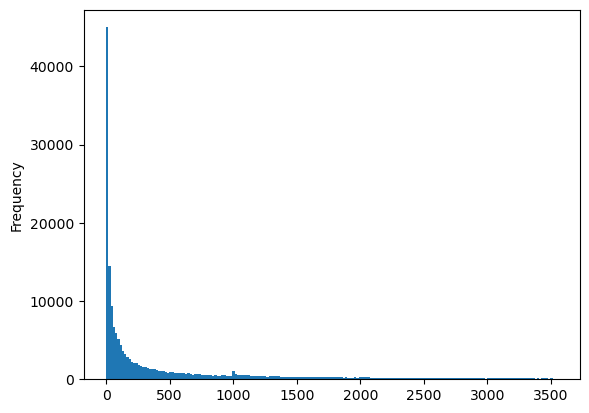

In [25]:
df[df.num_subscribers<3550].num_subscribers.plot.hist(bins=200)

<AxesSubplot:ylabel='Frequency'>

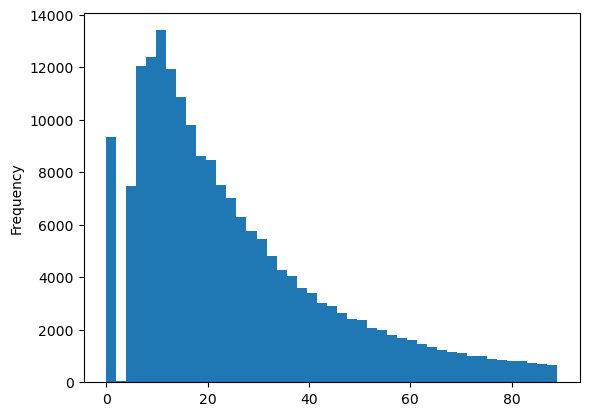

In [26]:
df[df.num_lectures<90].num_lectures.plot.hist(bins=45)

<AxesSubplot:>

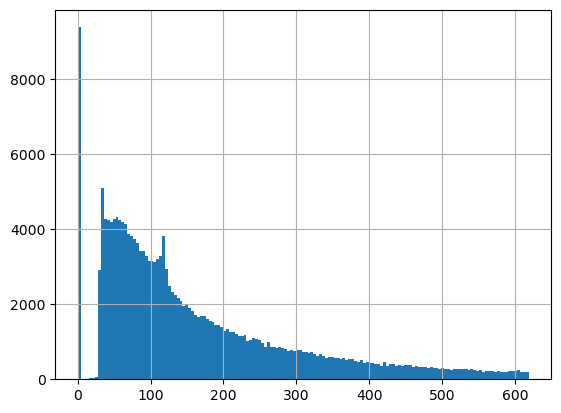

In [27]:
df[df.content_length_min<620].content_length_min.hist(bins=155)

Darslari soni va minuti 0ga o'ta yaqin darsliklarni o'ganaylik.

In [28]:
df[df.num_lectures == 0].sort_values(['num_subscribers', 'avg_rating'], ascending=False)[['course_url']].values

array([['/course/aws-certified-solutions-architect-associate-amazon-practice-exams-saa-c03/'],
       ['/course/aws-certified-cloud-practitioner-practice-test/'],
       ['/course/az900-azure-tests/'],
       ...,
       ['/course/comptia-linux-xko-004005-2-practice-exam-updated-2022/'],
       ['/course/cissp-4-full-exams-1-all-cissp-domains-125q-exam-2022/'],
       ['/course/cissp-4-full-exams-2-all-cissp-domains-125q-exam-2022/']],
      dtype=object)

Kurslarning URLi yordamida har xilini ko'rib chiqib xulosa qildimki bu turdagi kurslar faqat testdan tashkil topgan bo'lar ekan va shu sabab na leksiya va na minutga hech narsa yozilmagan ekan. Ba'zilari o'chib ham ketgan ekan. Bular Mutlaqo boshqacha bo'lgani uchun mean va standard deviationlarga yomon ta'sir qilgani tayin. bularsiz holatini ham ko'ramiz.

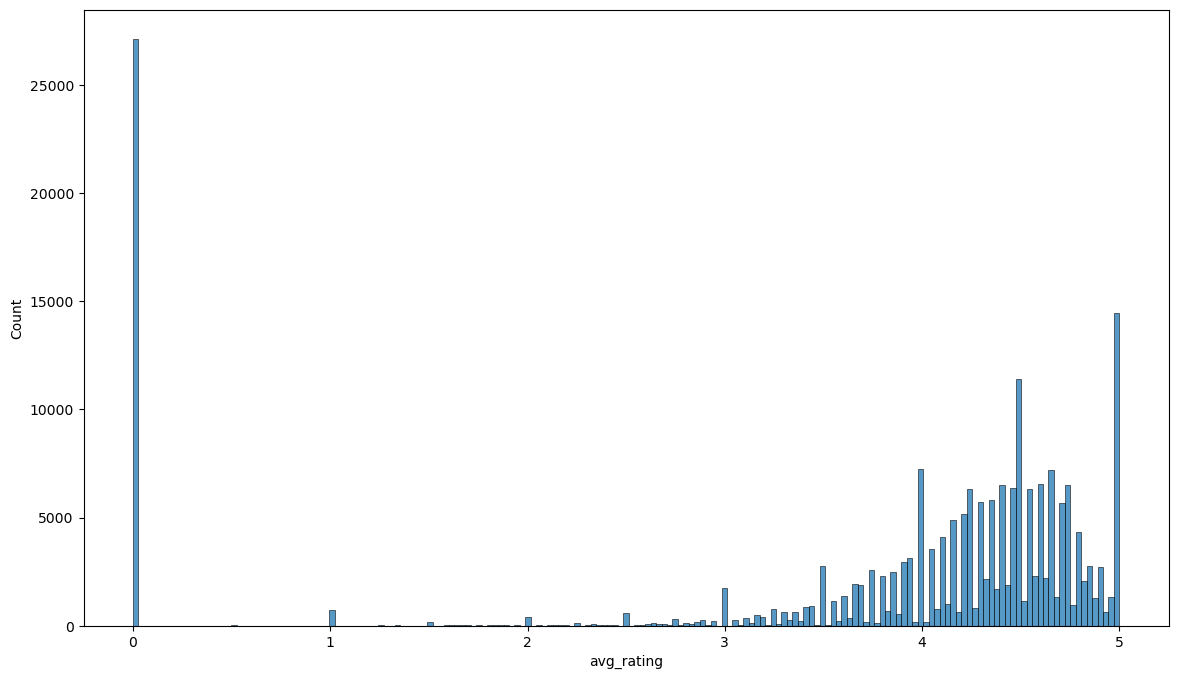

In [29]:
plt.figure(figsize=(14,8))
sns.histplot(data=df, x='avg_rating')
plt.show()

Ko'rib turganimiz bu ham kutilmagan darajada ko'p darslar o'rtacha reytingi 0. Demak shu 0 lar bizning standard farqlanishimizni kattalashtirib yuborgan. Bu kurslarning ko'pi yangi (pastdagi grafik) va hali ratingga ega bo'lmaganligi sabab o'rtacha rating 0 ko'rsatilyapti. Lekin qizig'i ba'zi eskilaringing 100dan ortiq obunachilari bor bo'lishiga qaramay komment va reviewlar ham yo'q. Izlanishlarim shuni ko'rsatdiki bu kurslar boshida tekin bo'lgan va tekin kursga bittada ulanuvchi botlar ularga ulanib olgan. U bot egalarida unaqa kurslar juda ko'p bo'lgani sabab va qiziqib o'tirmasdan obuna bo'lgani sabab ko'rmagan ham. Yoki tekin obuna bo'lish uchun o'qituvchi yaratgan link tarqalib ketgan va tekin obuna b'lish to'xtatilmagan. 
https://community.udemy.com/t5/First-time-course-creation/Surely-these-student-profiles-are-bots-fake/m-p/96860
Shu link orqali siz ham ko'rishingiz mumkin.

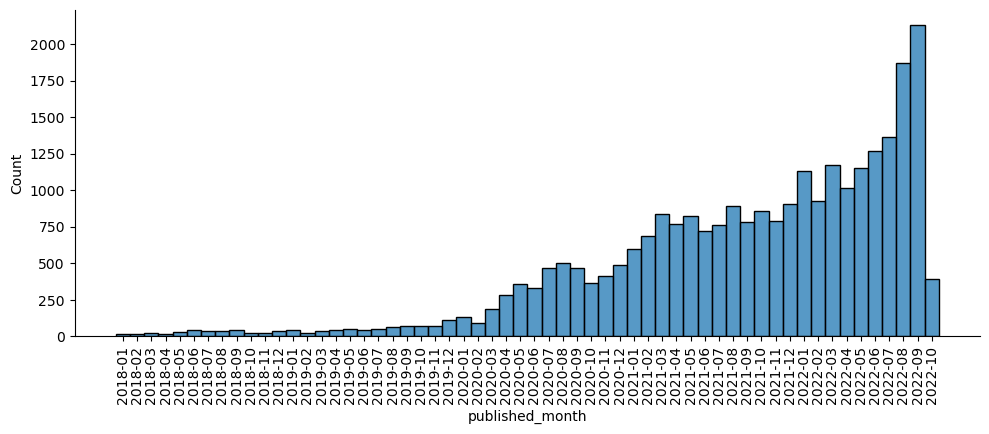

In [30]:
zero_df = df[df.avg_rating == 0]
df17 = zero_df[zero_df['published_date'] > np.datetime64("2018-01-01")]
sns.displot(data=df17.sort_values('published_date'), x=df17.published_month.astype('str').map(lambda x:x[13:-4]).sort_values(), height=4, aspect=2.5)
plt.xticks(rotation=90)
plt.show()

In [31]:
zero_df.sort_values('num_subscribers').tail()

,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,published_date,published_month,last_update_month
205092,True,29.99,3003.0,0.0,0.0,0.0,17.0,167.0,2022-08-16 07:45:28,2022-08-15,Development,Web Development,WordPress Plugins,English,/course/how-to-wordpress-plugins/,Smart Mind,2022-08-16,"(2022-07-31, 2022-08-31]","(2022-07-31, 2022-08-31]"
165530,True,59.99,3020.0,0.0,0.0,0.0,0.0,0.0,2021-10-24 19:17:31,2021-10-18,IT & Software,IT Certifications,Android Development,English,/course/android-security-practice-tests-certif...,Salem Salem,2021-10-24,"(2021-09-30, 2021-10-31]","(2021-09-30, 2021-10-31]"
152005,True,24.99,4112.0,0.0,0.0,0.0,13.0,620.0,2021-08-14 16:00:09,2021-08-17,Teaching & Academics,Math,Algebra,English,/course/quadratic-equations/,Mathiit Digital,2021-08-14,"(2021-07-31, 2021-08-31]","(2021-07-31, 2021-08-31]"
45948,True,129.99,4489.0,0.0,0.0,0.0,61.0,452.0,2018-06-22 19:47:53,2021-05-03,Teaching & Academics,Language Learning,HSK,English,/course/chinese-characters-you-must-know-for-h...,David Yao,2018-06-22,"(2018-05-31, 2018-06-30]","(2021-04-30, 2021-05-31]"
148891,True,174.99,5139.0,0.0,0.0,0.0,27.0,120.0,2021-05-22 21:31:09,2021-06-18,Teaching & Academics,Online Education,Online Course Marketing,English,/course/beginners-online-course-marketing-meth...,Ian Stables,2021-05-22,"(2021-04-30, 2021-05-31]","(2021-05-31, 2021-06-30]"


Nollarni olib tashlab datasetni tahlil qilamiz.

In [32]:
df_zeroless = df[(df.avg_rating > 0) & (df.content_length_min > 0) & (df.num_lectures > 0)]
df_zeroless.describe()

,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
count,175950.000000,1.759500e+05,175950.000000,175950.000000,175950.000000,175950.000000,175950.000000
mean,83.637758,3.638553e+03,4.317293,288.562660,53.063848,40.498988,291.111270
std,114.483467,1.691896e+04,0.529850,2678.285871,387.513274,54.587968,480.792678
min,0.000000,0.000000e+00,0.500000,1.000000,0.000000,1.000000,1.000000
25%,19.990000,6.200000e+01,4.050000,7.000000,2.000000,13.000000,79.000000
50%,39.990000,3.530000e+02,4.407407,26.000000,7.000000,24.000000,148.000000
75%,99.990000,1.943000e+03,4.666666,98.000000,24.000000,46.000000,316.000000
max,999.990000,1.752364e+06,5.000000,436457.000000,39040.000000,1095.000000,22570.000000


Bu yerda avg_ratingning standard farqlanishi ancha kamaydi (0.53), mean ham ancha medianaga yaqinlashib distribution normallashdi. Leksiyalar soni va uzunligi bo'yicha esa deyarli farq yo'q. distribution normal bo'lmagani uchun aytganimday uncha foyda yo'q.

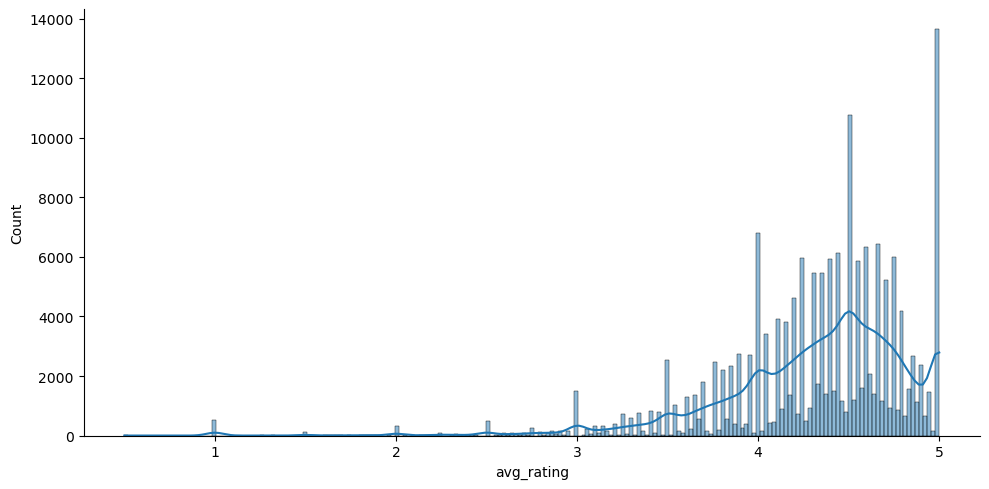

In [33]:
sns.displot(data=df_zeroless, x='avg_rating', kde=True, height=5, aspect=2)
plt.show()

Yana bir noodatiylikni reytingi 5larda kuzatish mumkin. Bu obunachilari hali kam kurslar sabab bo'lishi mumkin. 

In [34]:
df[(df.avg_rating==5)].num_subscribers.value_counts()[:15]

3.0     690
4.0     676
2.0     588
5.0     588
6.0     571
8.0     511
7.0     506
1.0     466
9.0     435
10.0    423
11.0    384
12.0    373
14.0    315
15.0    299
Name: num_subscribers, dtype: int64

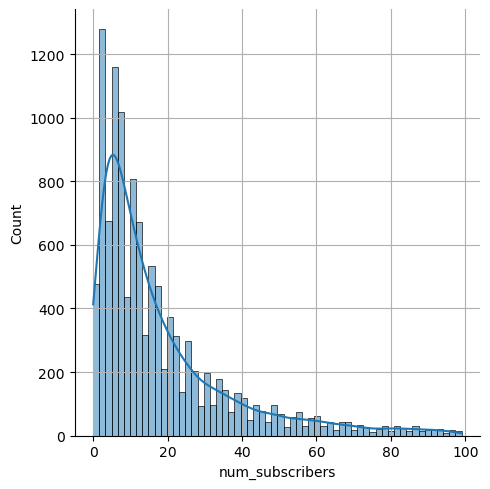

In [35]:
sns.displot(data=df[(df.avg_rating==5) & (df.num_subscribers<100)], x='num_subscribers', kde=True)
plt.yticks()
plt.grid(which='both')
plt.show()

Tahmin to'gri ekan. Endi ko'rsatkichlar aro bog'liqlikni ko'rib chiqaylik.

In [36]:
df.corr()

,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
is_paid,1.000000,0.236734,-0.086600,-0.089891,-0.008374,-0.012557,0.132045,0.130163
price,0.236734,1.000000,0.018133,0.031515,0.032562,0.039323,0.150997,0.154963
num_subscribers,-0.086600,0.018133,1.000000,0.077116,0.737199,0.730953,0.180409,0.119666
avg_rating,-0.089891,0.031515,0.077116,1.000000,0.048499,0.060720,0.146022,0.108165
num_reviews,-0.008374,0.032562,0.737199,0.048499,1.000000,0.951832,0.186060,0.125959
num_comments,-0.012557,0.039323,0.730953,0.060720,0.951832,1.000000,0.202743,0.138012
num_lectures,0.132045,0.150997,0.180409,0.146022,0.186060,0.202743,1.000000,0.729765
content_length_min,0.130163,0.154963,0.119666,0.108165,0.125959,0.138012,0.729765,1.000000


Kutganimday narxning boshqa ko'rsatkichlariga deyatli aloqasi yo'q. Obunachilar soni, kommentlar va reviewlar aro bog'liqlik ham, leksiyalar soni va kontent uzunligi o'rtasidagi bo'g'liqlik ham tushunarli. O'rtacha reyting va obunachilar soni o'rtasida ham bog'liqlik yo'q deyapti-ku lekin obunachilari ancha ko'p kurslarning hammasi 4.6 atrofida bo'lsa kerak.

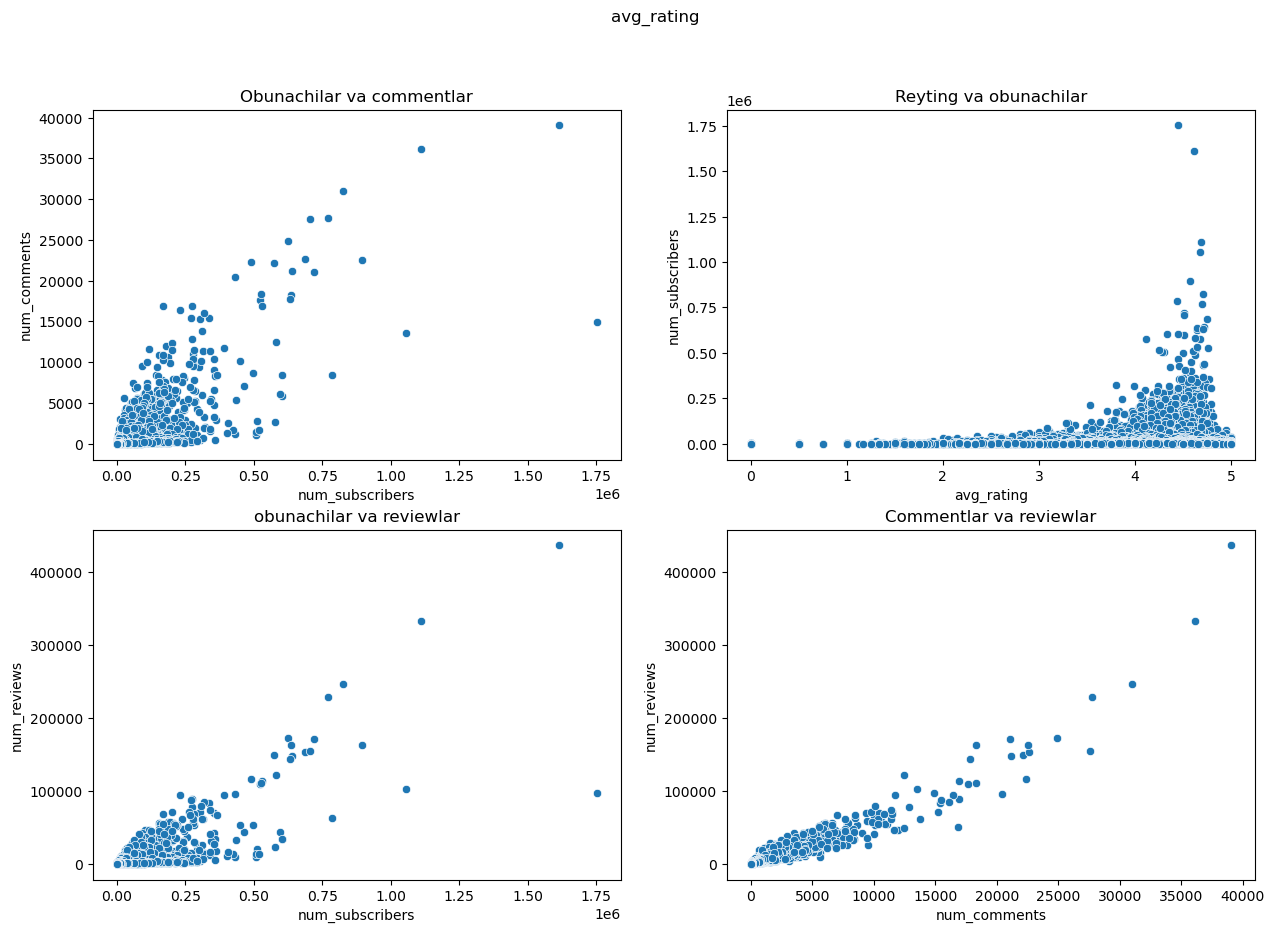

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
# Umumiy chizma nomini beramiz:
fig.suptitle("avg_rating")
sns.scatterplot(ax=ax[0, 0], data=df, x='num_subscribers', y='num_comments')
sns.scatterplot(ax=ax[0, 1], data=df, x='avg_rating', y='num_subscribers')
sns.scatterplot(ax=ax[1, 0], data=df, x=df['num_subscribers'], y=df['num_reviews'])
sns.scatterplot(ax=ax[1, 1], data=df, x=df['num_comments'], y=df['num_reviews'])
# Har bir grafik uchun nom:
ax[0,0].set_title("Obunachilar va commentlar")
ax[0,1].set_title("Reyting va obunachilar")
ax[1,0].set_title("obunachilar va reviewlar")
ax[1,1].set_title("Commentlar va reviewlar")
plt.show()

Bu yeerda bog'liqlikni vizual jihatdan ko'rish mumkin.

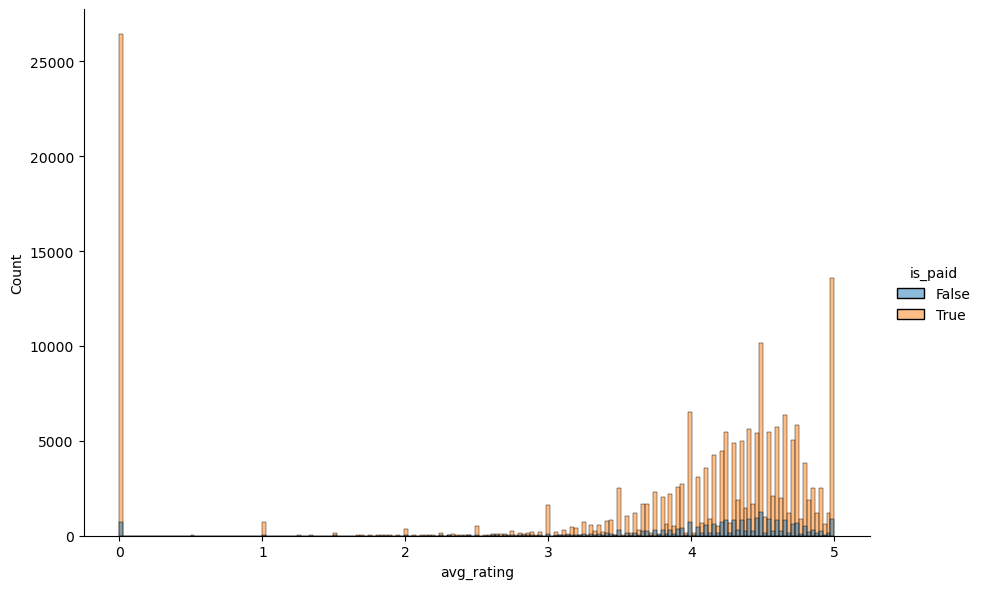

In [38]:
sns.displot(data=df, x='avg_rating', hue='is_paid', height=6, aspect=1.5)
plt.show()

Yuqorida pulli va tekin darslarning reytinglar bo'yicha taqsimotini ko'rishimiz mumkin. Xulosa pulli kurslar egasi bo'lsangiz 0 yoki 5 olishingiz ehtimoli nisbatan bir muncha yuqoriroq bo'lar ekan.

Endi yana tahlilni davom ettirish uchun ma'lumotlarni excelga ham o'tkazaylik.

In [39]:
pivot = df.groupby(by = ['category', 'subcategory'])[['num_subscribers', 'avg_rating', 'num_reviews', 'num_comments', 'num_lectures', 'content_length_min']].agg([len, np.mean, np.median])
with pd.ExcelWriter("Udemy-pivot-table.xlsx") as writer:
    pivot.to_excel(writer, sheet_name="category_subcategory")
    pivot.groupby('category').mean().to_excel(writer, sheet_name="category_only")

Endi staristik meanlarni yaxshiroq kategoriya va subkategoriyalar bo'yicha ko'rib chiqaylik.

In [40]:
pivot.sort_values([('num_subscribers', 'mean')], ascending=False).head(20)

num_subscribers  \
                                                                   len   
category             subcategory                                         
Development          Programming Languages                        7022   
                     Data Science                                 2836   
                     Web Development                             10383   
Business             Business Analytics & Intelligence            1760   
Marketing            Search Engine Optimization                    871   
Development          Software Testing                             1038   
                     Database Design & Development                1715   
IT & Software        Network & Security                           4832   
Development          Mobile Development                           2676   
Design               Web Design                                   1355   
Photography & Video  Photography Tools                             397   
Development          Software Development Tools                   1522   
Design               User Experience Design                        584   
Office Productivity  Microsoft                                    4307   
Photography & Video  Photography                                   443   
Development          Software Engineering                         1523   
Marketing            Video & Mobile Marketing                      546   
Office Productivity  Google                                        429   
Finance & Accounting Financial Modeling & Analysis                 497   
Design               Design Tools                                 2300   

                                                                             \
                                                               mean  median   
category             subcategory                                              
Development          Programming Languages              8316.053688   725.0   
                     Data Science                       7642.193935   644.5   
                     Web Development                    7377.021959   850.0   
Business             Business Analytics & Intelligence  6531.147159   775.0   
Marketing            Search Engine Optimization         5781.593571   630.0   
Development          Software Testing                   5700.342004  1008.0   
                     Database Design & Development      5660.730612   738.0   
IT & Software        Network & Security                 5450.646109   552.0   
Development          Mobile Development                 5427.760463   580.5   
Design               Web Design                         5396.464207   812.0   
Photography & Video  Photography Tools                  5218.148615   308.0   
Development          Software Development Tools         5215.400131   679.5   
Design               User Experience Design             5144.181507   532.5   
Office Productivity  Microsoft                          5043.936847   379.0   
Photography & Video  Photography                        4924.573363   208.0   
Development          Software Engineering               4853.145765   774.0   
Marketing            Video & Mobile Marketing           4599.822344   490.0   
Office Productivity  Google                             4450.123543   344.0   
Finance & Accounting Financial Modeling & Analysis      4418.474849   265.0   
Design               Design Tools                       4402.349565   396.5   

                                                       avg_rating            \
                                                              len      mean   
category             subcategory                                              
Development          Programming Languages                   7022  3.960225   
                     Data Science                            2836  3.963157   
                     Web Development                        10383  3.994241   
Business             Business Analytics & Intelligence      

Endi tillarni o'rtacha obunachilar soni bo'yicha solistiraylik. Fin, gaiti, nepal, pushtun, panjob va qozoq tillaridagi uzun qora tayoq farqlanishni bildiradi. Ya'ni outlierlar bor va MEANni ko'tarib yuborgan ko'rinadi.

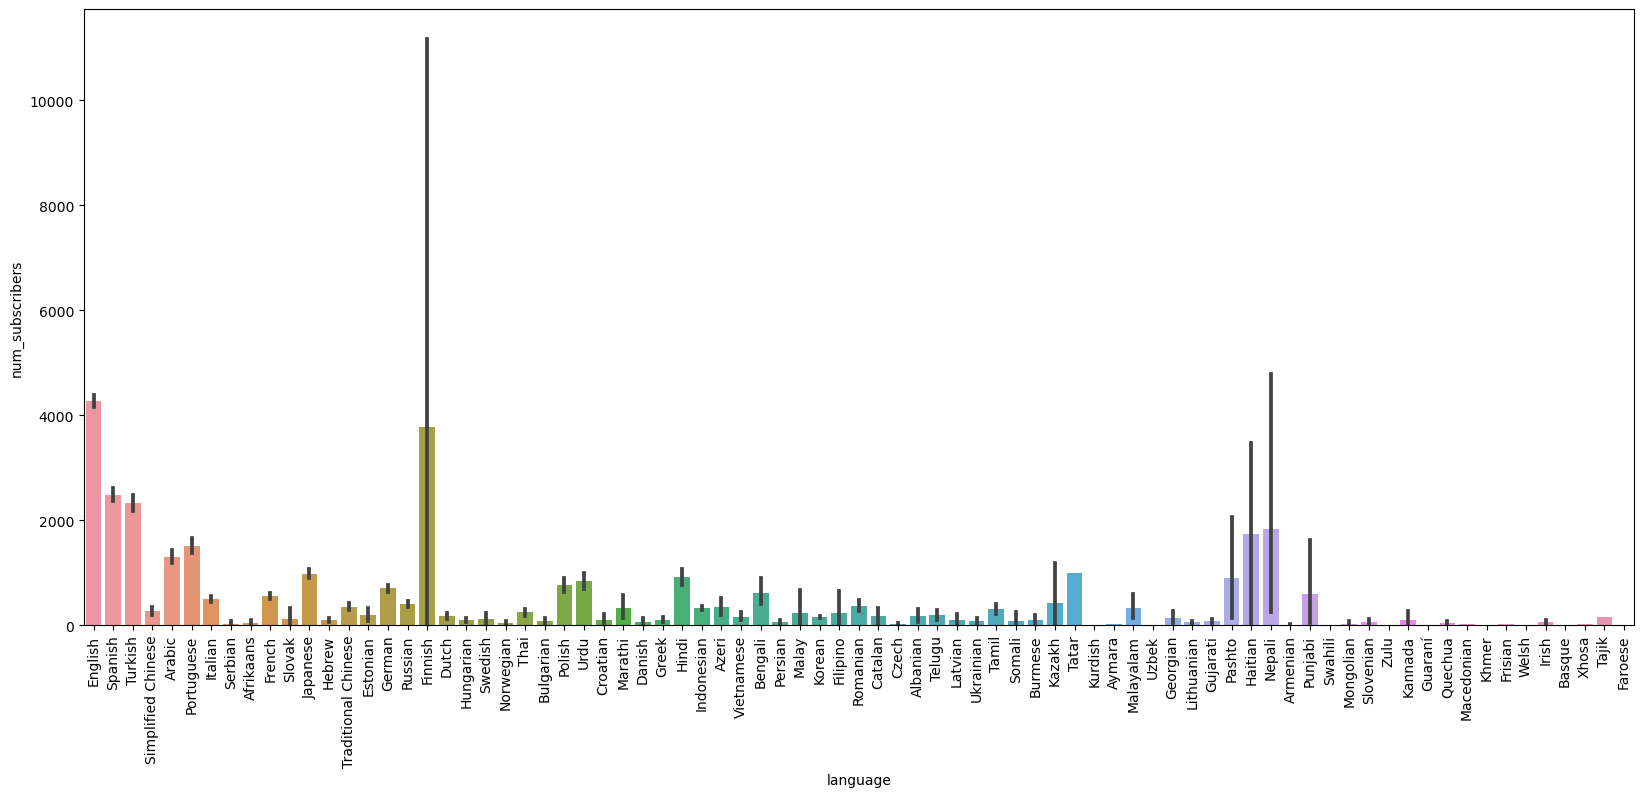

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x=df['language'], y='num_subscribers')
plt.xticks(rotation=90)
plt.show()

In [42]:
df.groupby('language').mean().sort_values('num_subscribers').tail(10)

,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min
language,,,,,,,,
Japanese,0.871216,16.794026,984.663478,3.858719,170.277841,20.508709,36.550257,176.589806
Tatar,1.000000,19.990000,991.000000,3.750000,14.000000,2.000000,16.000000,220.000000
Arabic,0.852030,61.874851,1305.731961,3.627930,64.325957,9.801039,30.254570,314.302675
Portuguese,0.888143,123.674106,1504.435679,3.975961,233.209746,46.435192,38.190633,327.216784
Haitian,0.000000,0.000000,1747.000000,4.650000,299.500000,102.500000,41.000000,114.000000
Nepali,0.769231,49.223077,1829.384615,4.107692,30.461538,6.000000,30.538462,276.538462
Turkish,0.876404,212.949720,2328.924312,4.039407,199.875170,29.931720,48.724657,454.297197
Spanish,0.891631,82.585726,2484.808633,3.848754,185.019630,52.421192,40.972047,313.986167
Finnish,0.846154,58.068462,3777.384615,3.303526,55.153846,10.538462,28.153846,129.615385


Endi fin tilidagi darslarni bir ko'rib ishonch hosil qilaylik

In [43]:
df[df.language=='Finnish']

,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,published_date,published_month,last_update_month
2116,True,39.99,157.0,4.300000,32.0,6.0,42.0,181.0,2014-01-09 16:32:17,2014-01-12,Personal Development,Other Personal Development,Organization,Finnish,/course/kaaos-kuriin/,Elina Alasentie,2014-01-09,"(2013-12-31, 2014-01-31]","(2013-12-31, 2014-01-31]"
7850,False,0.00,268.0,3.800000,5.0,1.0,49.0,71.0,2015-03-30 23:32:17,2015-10-11,Health & Fitness,General Health,Pharmacy,Finnish,/course/laakelaskut/,Satakunta UAS & Metropolia UAS,2015-03-30,"(2015-02-28, 2015-03-31]","(2015-09-30, 2015-10-31]"
7906,False,0.00,244.0,3.900000,5.0,3.0,40.0,50.0,2015-03-30 23:17:52,2022-06-08,Business,Industry,Power Engineering,Finnish,/course/energiatekniikan-perusteet/,Eero Hammais,2015-03-30,"(2015-02-28, 2015-03-31]","(2022-05-31, 2022-06-30]"
30920,True,199.99,47982.0,3.850000,563.0,105.0,12.0,55.0,2017-08-28 17:43:31,2022-08-21,Business,E-Commerce,Passive Income,Finnish,/course/how-to-make-passive-income-without-exp...,Money Makers Academy,2017-08-28,"(2017-07-31, 2017-08-31]","(2022-07-31, 2022-08-31]"
34715,True,99.99,46.0,4.625000,4.0,2.0,33.0,163.0,2017-12-19 02:52:59,2017-11-21,Office Productivity,Microsoft,Excel,Finnish,/course/excelkurssi/,Tomi Saarinen,2017-12-19,"(2017-11-30, 2017-12-31]","(2017-10-31, 2017-11-30]"
50787,True,34.99,329.0,4.100000,75.0,12.0,48.0,422.0,2018-09-20 20:45:34,2020-02-17,Development,Game Development,Game Development Fundamentals,Finnish,/course/pelisuunnittelija/,Klaus Kääriäinen,2018-09-20,"(2018-08-31, 2018-09-30]","(2020-01-31, 2020-02-29]"
122255,True,29.99,41.0,4.600000,18.0,2.0,33.0,92.0,2020-12-04 00:49:11,2020-11-25,Design,3D & Animation,3D Modeling,Finnish,/course/3d-mallinnus-aloittelijalle-blenderissa/,Holotna Ltd,2020-12-04,"(2020-11-30, 2020-12-31]","(2020-10-31, 2020-11-30]"
130483,True,49.99,8.0,4.833334,3.0,1.0,26.0,112.0,2021-07-23 21:32:58,2021-09-08,Photography & Video,Video Design,DaVinci Resolve,Finnish,/course/videoeditoinnin-perusteet-davinci-reso...,Holotna Ltd,2021-07-23,"(2021-06-30, 2021-07-31]","(2021-08-31, 2021-09-30]"
135727,True,149.99,20.0,4.687500,8.0,3.0,49.0,300.0,2021-05-18 18:31:05,2021-05-18,Design,Game Design,Game Design,Finnish,/course/optimoitu-unity-maailma-blenderissa-te...,Holotna Ltd,2021-05-18,"(2021-04-30, 2021-05-31]","(2021-04-30, 2021-05-31]"
165468,True,29.99,0.0,0.000000,0.0,0.0,8.0,38.0,2022-05-01 14:53:06,2022-04-30,Design,3D & Animation,Blender,Finnish,/course/3d-mallin-lisaaminen-valokuvaan-blende...,Holotna Ltd,2022-05-01,"(2022-04-30, 2022-05-31]","(2022-03-31, 2022-04-30]"


Endi narxlarni analiz qilaylik.

In [44]:
bins = np.arange(-1, 1010, 10)
df['price_bins'] = pd.cut(df.price, bins)
df.price_bins.value_counts()[:10]

(19, 29]      56348
(-1, 9]       33683
(199, 209]    17650
(29, 39]      15078
(79, 89]      11768
(49, 59]      11375
(99, 109]     11207
(39, 49]       8126
(89, 99]       4586
(59, 69]       4457
Name: price_bins, dtype: int64

Buning statistik pivot jadvalini ham excelda umumiy ma'noda o'rganib chiqishimiz mumkin.

In [45]:
df1 = df.drop(['category', 'subcategory', 'topic', 'language', 'course_url', 'instructor_name', 'published_month', 'last_update_month'], axis=1)
by_price_bins = df1.groupby('price_bins').agg([len, np.mean, np.median])
by_price_bins_sorted = df1.groupby('price_bins').agg([len, np.mean, np.median]).sort_values(('num_subscribers', 'mean'))

with pd.ExcelWriter("by-price_bins.xlsx") as writer:
    by_price_bins.to_excel(writer, sheet_name="By_price_bins")
    by_price_bins_sorted.to_excel(writer, sheet_name="Sorted")
